## Load Libraries

In [15]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

## Over Sampling Example

In [ ]:
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
print(Counter(y))

oversample = RandomOverSampler(sampling_strategy='minority') # over sample minority to match majority
#oversample = RandomOverSampling(sampling_strategy=0.5) # over sample minority to have half as many observations as majority

X_over, y_over = oversample.fit_resample(X, y)

print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


## SMOTE Example

In [8]:
X, y = make_classification(n_classes=2, class_sep=0.5, weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0, n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

print(Counter(y))

sm = SMOTE(random_state=42, sampling_strategy = {0:1000, 1:2000})

X_res, y_res = sm.fit_resample(X, y)

print(Counter(y_res))

Counter({1: 950, 0: 50})
Counter({1: 2000, 0: 1000})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (1000) in class 0 will be larger than the number of samples in the majority class (class #1 -> 950)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (2000) in class 1 will be larger than the number of samples in the majority class (class #1 -> 950)
  f"After over-sampling, the number of samples ({n_samples})"


## Stratified Split Example

In [ ]:
X = np.array([[1,2],[3,4],[1,2],[3,4],[1,2],[3,4]])
y = np.array([0,0,0,1,1,1])

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
for train_index, test_index in sss.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

print(X_train)
print(y_train)
print(X_test)
print(y_test)

TRAIN: [5 2 3] TEST: [4 1 0]
[[3 4]
 [1 2]
 [3 4]]
[1 0 1]
[[1 2]
 [3 4]
 [1 2]]
[1 0 0]


## Load WBA Data

In [9]:
# re upload files everytime run

uploaded = files.upload()

Saving X_test.csv to X_test.csv
Saving X_train.csv to X_train.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv


In [10]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

frames_X = [X_train, X_test]
frames_y = [y_train, y_test]

X = pd.concat(frames_X)
y = pd.concat(frames_y)

print(X.shape)
print(y.shape)

(191, 120)
(191, 1)
(48, 120)
(48, 1)
(239, 120)
(239, 1)


## Over Sample Minority Class

In [ ]:
print(Counter(y['OverallPoF']))

oversample = RandomOverSampler(sampling_strategy='minority') # over sample minority to match majority
#oversample = RandomOverSampling(sampling_strategy=0.5) # over sample minority to have half as many observations as majority

X_over, y_over = oversample.fit_resample(X, y)

print(Counter(y_over['OverallPoF']))

Counter({0: 201, 1: 38})
Counter({1: 201, 0: 201})


## SMOTE Oversampling

In [20]:
print(Counter(y['OverallPoF']))

sm = SMOTE(random_state=42, sampling_strategy = {0:500, 1:38})

X_res, y_res = sm.fit_resample(X, y)

print(Counter(y_res['OverallPoF']))

X_res.to_csv('X_smote.csv')
y_res.to_csv('y_smote.csv')

Counter({0: 201, 1: 38})
Counter({0: 500, 1: 38})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (500) in class 0 will be larger than the number of samples in the majority class (class #0 -> 201)
  f"After over-sampling, the number of samples ({n_samples})"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


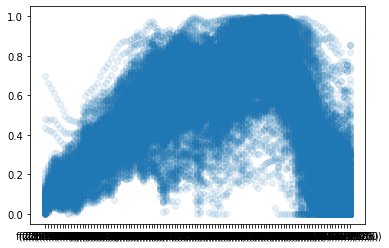

In [21]:
X_res['Subject'] = np.arange(len(X_res))
X_res_long = pd.melt(X_res, id_vars=['Subject','Gender','AgeY','ECV','TPP','SC','TympType','OAE1','OAE1.4','OAE2','OAE2.8','OAE4','Ear coded','Pressure'], value_vars=['f(226.0000)','f(226.0000)','f(257.3256)','f(280.6155)','f(297.3018)','f(324.2099)','f(343.4884)','f(363.9133)','f(385.5527)','f(408.4789)','f(432.7683)','f(458.5020)','f(471.9372)','f(500.0000)','f(514.6511)','f(545.2539)','f(561.2310)','f(577.6763)','f(594.6036)','f(629.9605)','f(648.4198)','f(667.4199)','f(686.9768)','f(707.1068)','f(727.8266)','f(749.1535)','f(771.1054)','f(793.7005)','f(816.9577)','f(840.8964)','f(865.5366)','f(890.8987)','f(917.0040)','f(943.8743)','f(971.5319)','f(1000.0000)','f(1029.3022)','f(1059.4631)','f(1090.5077)','f(1122.4620)','f(1155.3527)','f(1189.2071)','f(1224.0535)','f(1259.9210)','f(1296.8396)','f(1334.8399)','f(1373.9536)','f(1414.2136)','f(1455.6532)','f(1498.3071)','f(1542.2108)','f(1587.4011)','f(1633.9155)','f(1681.7928)','f(1731.0731)','f(1781.7974)','f(1834.0081)','f(1887.7486)','f(1943.0639)','f(2000.0000)','f(2058.6045)','f(2118.9262)','f(2181.0155)','f(2244.9241)','f(2310.7054)','f(2378.4142)','f(2448.1071)','f(2519.8421)','f(2593.6791)','f(2669.6797)','f(2747.9073)','f(2828.4271)','f(2911.3064)','f(2996.6142)','f(3084.4217)','f(3174.8021)','f(3267.8309)','f(3363.5857)','f(3462.1462)','f(3563.5949)','f(3668.0162)','f(3775.4973)','f(3886.1278)','f(4000.0000)','f(4117.2089)','f(4237.8524)','f(4362.0309)','f(4489.8482)','f(4621.4108)','f(4756.8285)','f(4896.2142)','f(5039.6842)','f(5187.3582)','f(5339.3594)','f(5495.8146)','f(5656.8542)','f(5822.6127)','f(5993.2283)','f(6168.8433)','f(6349.6042)','f(6535.6618)','f(6727.1713)','f(6924.2925)','f(7127.1897)','f(7336.0323)','f(7550.9945)','f(7772.2555)','f(8000.0000)'],var_name='Frequency', value_name='WBA')

plt.scatter(X_res_long["Frequency"], X_res_long["WBA"], alpha=0.1)
plt.show()

## Stratify Split

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=0)
for train_index, test_index in sss.split(X_over, y_over):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X_over.iloc[train_index,], X_over.iloc[test_index,]
  y_train, y_test = y_over.iloc[train_index,], y_over.iloc[test_index,]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

TRAIN: [330  39 277  36 400 118  99  19 159 304   2 380 183 301  91 186  28 126
  20  15   3  72 364 270 306 276 193 314 211 142  62 341 336  67  63 202
 215  27 188 288 333 261 360 323  77 151 155 358 374 369 287 102 286 327
 135  74 218 273 243 296 372 177 157  85 200 241 205  89 168 332 370  97
 216 337  14  82 310 125 347 120 342 192  70  57 121 180   0 108 129 114
 265 283  30 279 223 387 122 158 219 396   1 239 317 171 299  41 321   5
  64 133 389 293 381  43 348 123 181  80 398 217 144 143 385 262 146 255
 340 182   8 294 346 149 198 356 269 145  46  98  37 393 154 264 329 266
 292 313 190 355 350 148  73 386 214 153 373 127 134 272 238 131 247  44
  76 173 140 185 225  52 391 395  17   6 113 394 297 236 152 280 298  71
 282 137 315 384 166 335 368 209 362 197  26 161 260 308  18 263  60 222
 295 162 325 371 220 213 179 345 139 258 259  34 187  33 234  16  61 164
 245 361 165 284 110  38 201   9 257 281   7 267 103 116 278 229 354 107
  86 316 109 311 250 138 141  49 106 324 365

In [ ]:
X_train.to_csv('X_train_over.csv')
y_train.to_csv('y_train_over.csv')
X_test.to_csv('X_test_over.csv')
y_test.to_csv('y_test_over.csv')